In [5]:
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = pickle.load(open("X_train.pickle", "rb"))
Y_train = pickle.load(open("Y_train.pickle", "rb"))

X_val = pickle.load(open("X_val.pickle", "rb"))
Y_val = pickle.load(open("Y_val.pickle", "rb"))

X_test = pickle.load(open("X_test.pickle", "rb"))
Y_test = pickle.load(open("Y_test.pickle", "rb"))

In [3]:
X_test[712]

array([[0.05064684, 0.        , 0.        , ..., 0.        , 0.        ,
        0.08431491],
       [0.06907105, 0.        , 0.        , ..., 0.        , 0.        ,
        0.08467353],
       [0.06535613, 0.02810913, 0.03620436, ..., 0.01721273, 0.04641675,
        0.15373056],
       ...,
       [0.007824  , 0.08603561, 0.10577656, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

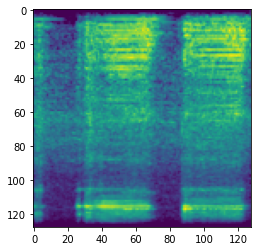

(128, 128)


In [9]:
plt.imshow(X_test[0])
plt.show()
print(X_test[0].shape)

In [29]:
model = tf.keras.Sequential()

In [30]:
model.add(tf.keras.layers.Conv2D(32,
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding = "same",
                         activation = "relu",
                         input_shape = (128,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [31]:
model.add(tf.keras.layers.Conv2D(64,
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding = "same",
                         activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding = "same",
                         activation = "relu"))

In [32]:
model.add(tf.keras.layers.Flatten())

In [33]:
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [34]:
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [35]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [36]:
results = model.fit(X_train, Y_train,
                   batch_size=128,
                   epochs=50,
                   validation_data=(X_val,Y_val))

Epoch 1/50
55/55 [==============================] - 85s 2s/step - loss: 0.2709 - accuracy: 0.9022 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
55/55 [==============================] - 83s 2s/step - loss: 0.0085 - accuracy: 0.9963 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
55/55 [==============================] - 83s 2s/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
55/55 [==============================] - 97s 2s/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
55/55 [==============================] - 92s 2s/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
55/55 [==============================] - 91s 2s/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
55/55 [==============================] - 90s 2s/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0000e+00 - val_accuracy:

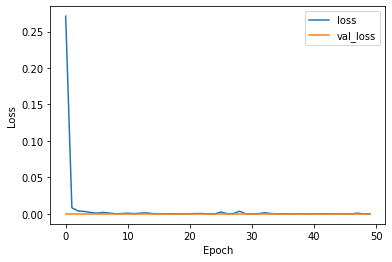

In [38]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

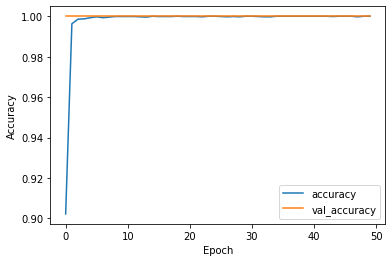

In [39]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [41]:
model.evaluate(X_test, Y_test)

28/28 [==============================] - 2s 83ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]